In [2]:
# Dataset source: https://www.kaggle.com/datasets/andrewmvd/cyberbullying-classification

First few rows of the dataset:
                                          tweet_text cyberbullying_type
0  In other words #katandandre, your food was cra...  not_cyberbullying
1  Why is #aussietv so white? #MKR #theblock #ImA...  not_cyberbullying
2  @XochitlSuckkks a classy whore? Or more red ve...  not_cyberbullying
3  @Jason_Gio meh. :P  thanks for the heads up, b...  not_cyberbullying
4  @RudhoeEnglish This is an ISIS account pretend...  not_cyberbullying


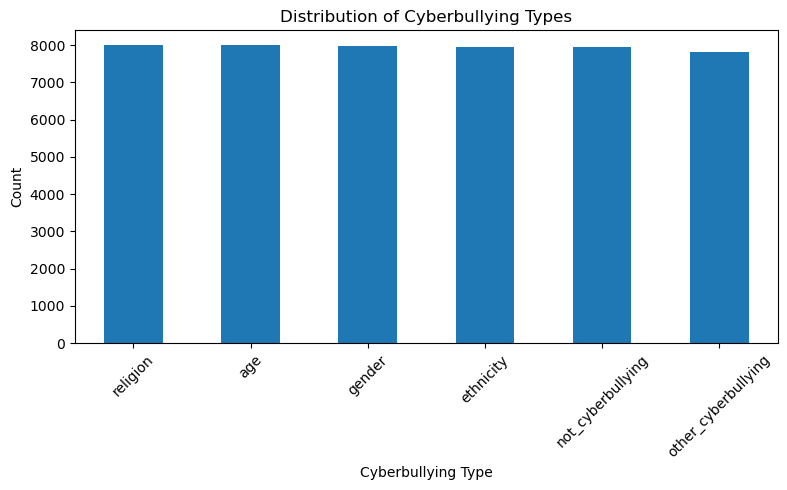

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('cyberbullying.csv')

# Display basic info
print("First few rows of the dataset:")
print(df.head())

# Count of each cyberbullying type
counts = df['cyberbullying_type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 5))
counts.plot(kind='bar')
plt.title('Distribution of Cyberbullying Types')
plt.xlabel('Cyberbullying Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


   word_count_range  tweet_count
0              1-10         8431
1             11-20        15474
2             21-30        11227
3             31-40         3968
4             41-50         6090
5             51-60         2439
6             61-70           44
7             71-80            1
8             81-90            0
9            91-100            1
10             100+           17


C:\Users\noven\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6670: RuntimeWarning: invalid value encountered in multiply
  boffset = -0.5 * dr * totwidth * (1 - 1 / nx)


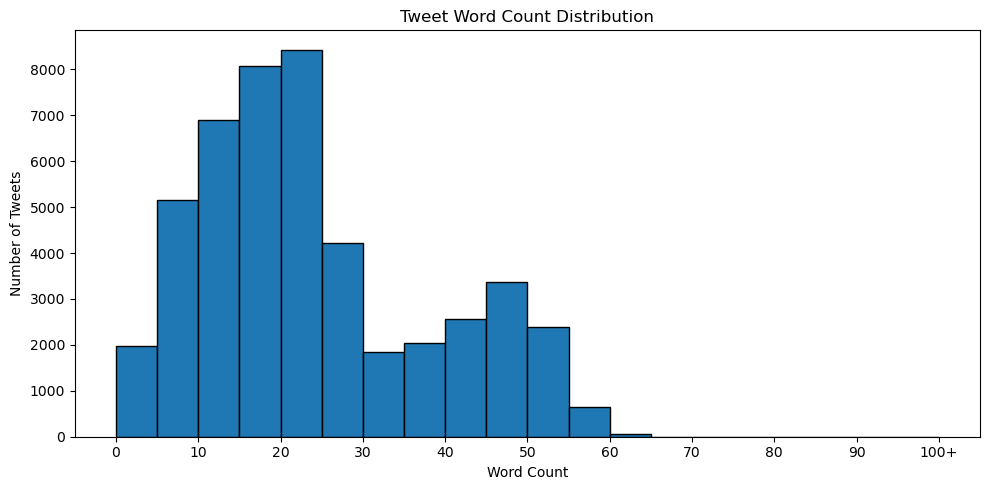

In [4]:
# Word counts

import pandas as pd

# Calculate word count
df['text_length'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Define bins and labels, grouping all lengths > 100 into one bin
bins = list(range(0, 101, 10)) + [float('inf')]  # 0–10, 11–20, ..., 91–100, 100+
labels = [f'{i+1}-{i+10}' for i in range(0, 100, 10)] + ['100+']

# Bin the text lengths
df['length_bin'] = pd.cut(df['text_length'], bins=bins, labels=labels, right=True)

# Generate frequency table
bin_table = df['length_bin'].value_counts().sort_index().reset_index()
bin_table.columns = ['word_count_range', 'tweet_count']

# Display the table
print(bin_table)

# Calculate text length in words
df['text_length'] = df['tweet_text'].apply(lambda x: len(str(x).split()))

# Cap values at 100+ for binning
df['length_capped'] = df['text_length'].apply(lambda x: x if x < 100 else 100)

# Plot histogram
plt.figure(figsize=(10, 5))
df['length_capped'].plot(kind='hist', bins=list(range(0, 101, 5)) + [float('inf')], edgecolor='black')
plt.title('Tweet Word Count Distribution')
plt.xlabel('Word Count')
plt.ylabel('Number of Tweets')
plt.xticks(list(range(0, 105, 10)), labels=[str(i) for i in range(0, 100, 10)] + ['100+'])
plt.tight_layout()
plt.show()


In [5]:
#TF-IDF

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

# Load the CSV
df = pd.read_csv('cyberbullying.csv')  # Replace with your file path
df['tweet_text'] = df['tweet_text'].fillna('')

# Group tweets by cyberbullying type
grouped = df.groupby('cyberbullying_type')['tweet_text'].apply(lambda texts: ' '.join(texts))

# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=100)
tfidf_matrix = vectorizer.fit_transform(grouped)

# Convert to DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), 
                        index=vectorizer.get_feature_names_out(), 
                        columns=grouped.index)

# For each label, get top N words by TF-IDF score
top_n = 10
summary = {}

for label in tfidf_df.columns:
    top_words = tfidf_df[label].sort_values(ascending=False).head(top_n)
    summary[label] = list(zip(top_words.index, top_words.values))

# Create a summary table
summary_table = pd.DataFrame.from_dict(summary, orient='index').transpose()
summary_table.columns.name = 'cyberbullying_type'
print(summary_table)


cyberbullying_type                             age  \
0                     (school, 0.6860797985256267)   
1                       (high, 0.4202238765969464)   
2                    (bullied, 0.3629131241960677)   
3                     (bully, 0.22767624083284319)   
4                      (girl, 0.19477409664874162)   
5                     (girls, 0.19394948150628294)   
6                      (like, 0.15313103195457797)   
7                   (bullies, 0.13531934487747035)   
8                      (just, 0.09004797355648851)   
9                    (people, 0.07710151581988714)   

cyberbullying_type                         ethnicity  \
0                       (nigger, 0.5901864568203693)   
1                         (fuck, 0.4426311345545887)   
2                        (dumb, 0.44169927953447374)   
3                     (niggers, 0.20735211499321993)   
4                         (ass, 0.19314813144200235)   
5                   (tayyoung_, 0.18339798095907922)   
6            

Generating word cloud for label: age


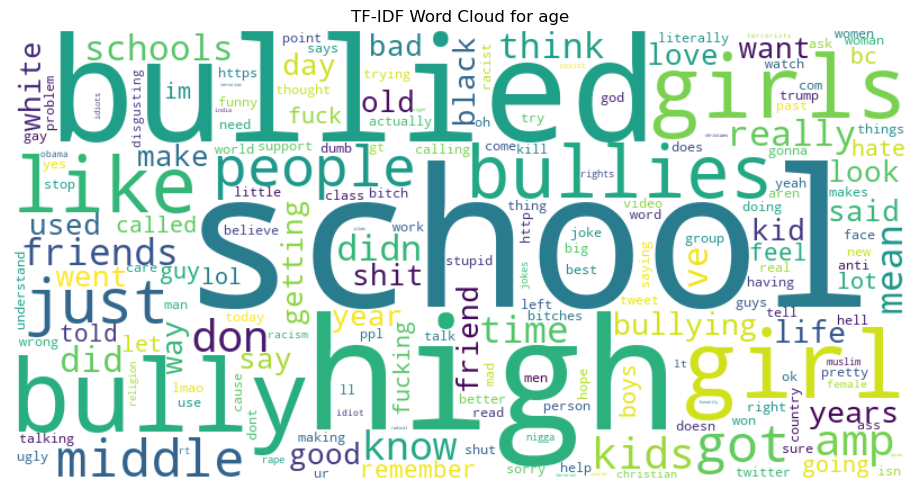

Generating word cloud for label: ethnicity


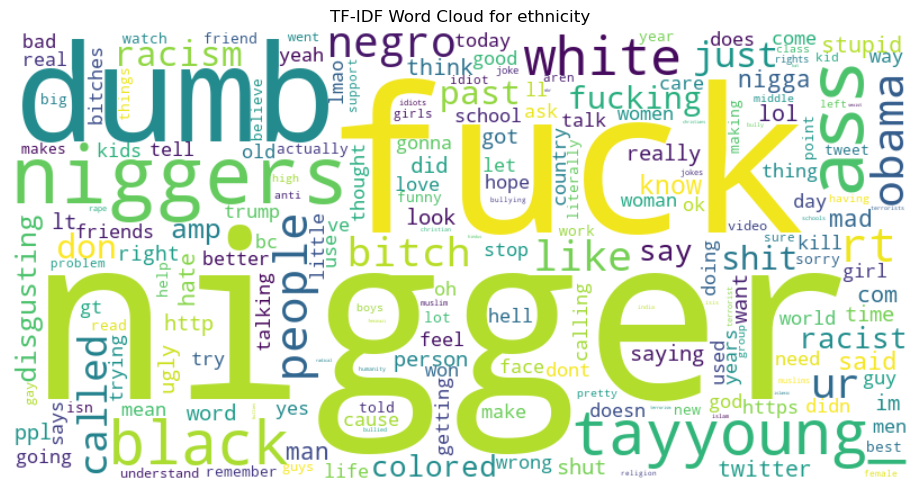

Generating word cloud for label: gender


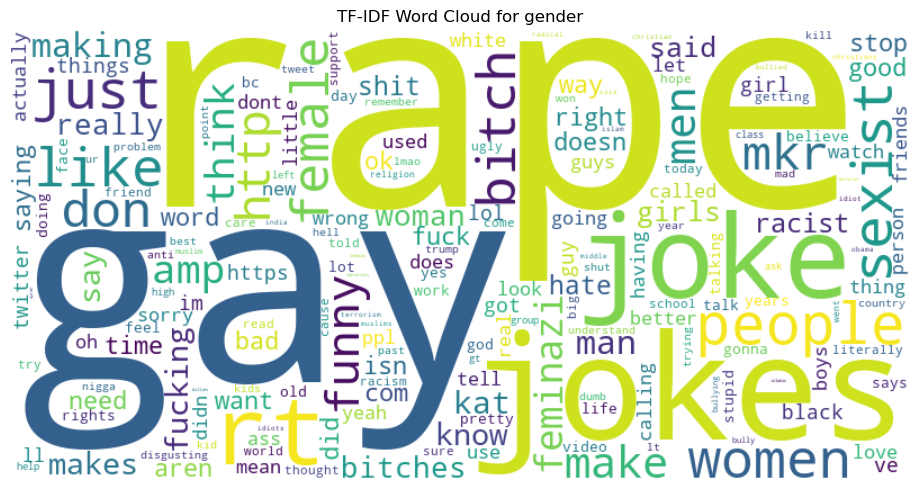

Generating word cloud for label: not_cyberbullying


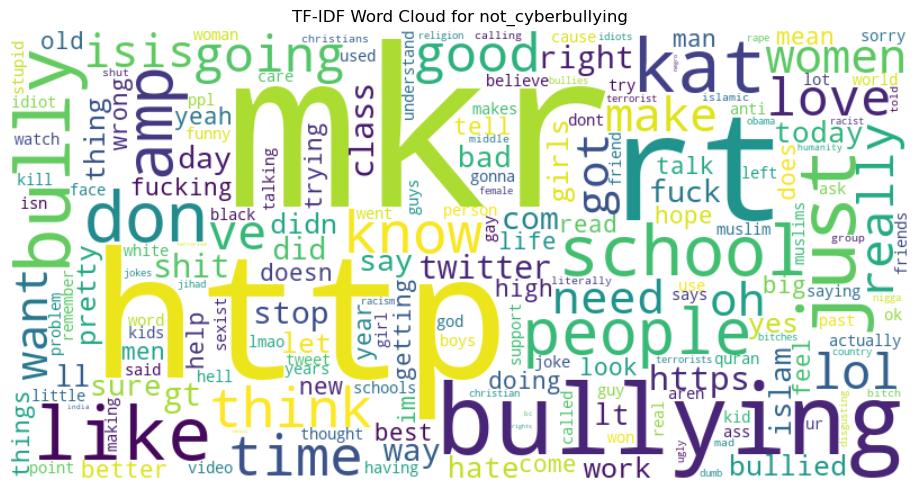

Generating word cloud for label: other_cyberbullying


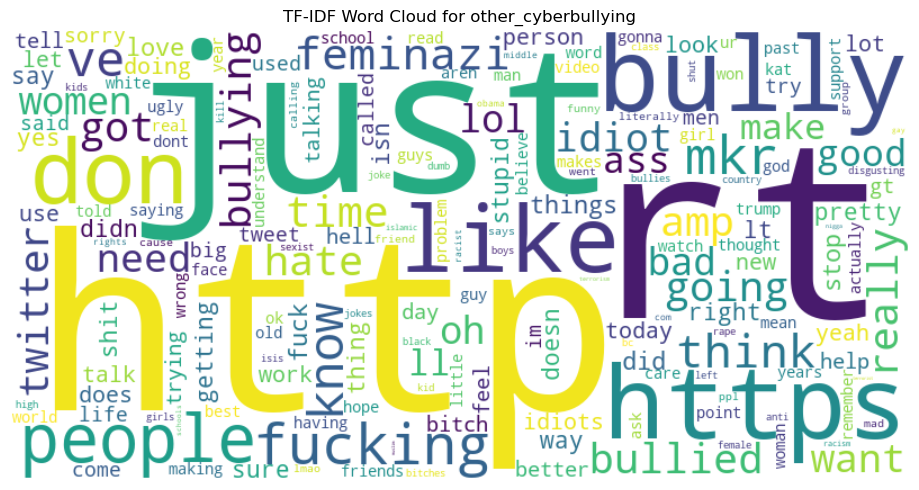

Generating word cloud for label: religion


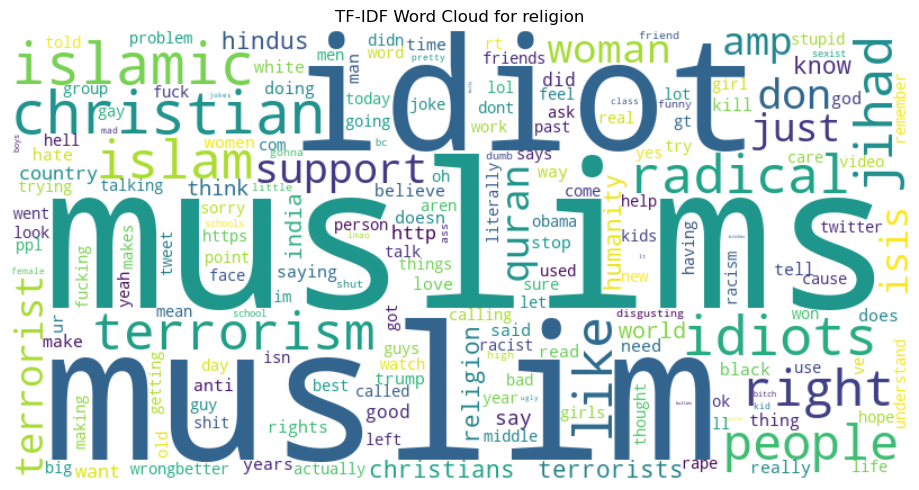

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Load the CSV
df = pd.read_csv('cyberbullying.csv')

# Fill missing text (if any)
df['tweet_text'] = df['tweet_text'].fillna('')

# Group by cyberbullying_type
grouped = df.groupby('cyberbullying_type')['tweet_text'].apply(lambda texts: ' '.join(texts))

# TF-IDF vectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=200)
tfidf_matrix = vectorizer.fit_transform(grouped)

# Convert to a DataFrame
tfidf_df = pd.DataFrame(tfidf_matrix.T.toarray(), index=vectorizer.get_feature_names_out(), columns=grouped.index)

# Plot WordClouds
for label in tfidf_df.columns:
    print(f"Generating word cloud for label: {label}")
    wordcloud = WordCloud(width=800, height=400, background_color='white')
    freqs = tfidf_df[label].to_dict()
    wordcloud.generate_from_frequencies(freqs)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'TF-IDF Word Cloud for {label}')
    plt.tight_layout()
    plt.show()


In [ ]:
# STEP 0: Install required packages (run this in Colab or locally once)
!pip install transformers datasets evaluate -q

In [11]:
# STEP 1: Imports
import pandas as pd
import numpy as np
from datasets import Dataset
from sklearn.preprocessing import LabelEncoder
from transformers import ElectraTokenizer, ElectraForSequenceClassification, TrainingArguments, Trainer
import evaluate

# STEP 2: Load and preprocess your dataset
df = pd.read_csv('cyberbullying.csv')  # Replace with your actual path
df = df[['tweet_text', 'cyberbullying_type']].dropna()

# Encode text labels to numeric
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['cyberbullying_type'])

# Save the label mapping for interpretation later
label_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Label mapping:", label_mapping)

# Convert to Hugging Face Dataset
dataset = Dataset.from_pandas(df[['tweet_text', 'label']])

# STEP 3: Tokenization with ELECTRA
tokenizer = ElectraTokenizer.from_pretrained("google/electra-base-discriminator")

def tokenize_function(example):
    return tokenizer(example["tweet_text"], padding="max_length", truncation=True, max_length=128)

dataset = dataset.map(tokenize_function, batched=True)
dataset = dataset.train_test_split(test_size=0.2, seed=42)
dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# STEP 4: Load ELECTRA model for classification
model = ElectraForSequenceClassification.from_pretrained(
    "google/electra-base-discriminator",
    num_labels=len(label_mapping)
)

# STEP 5: Define metrics for evaluation
accuracy = evaluate.load("accuracy")
f1 = evaluate.load("f1")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)

    acc = accuracy.compute(predictions=preds, references=labels)['accuracy']
    f1_score = f1.compute(predictions=preds, references=labels, average="weighted")['f1']

    return {
        "accuracy": acc,
        "f1": f1_score
    }

# STEP 6: Define training arguments
training_args = TrainingArguments(
    output_dir="./electra-cyberbullying-checkpoints",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="f1"
)

# STEP 7: Trainer setup
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset["train"],
    eval_dataset=dataset["test"],
    compute_metrics=compute_metrics,
)

# STEP 8: Train the model
trainer.train()

# STEP 9: Evaluate
trainer.evaluate()


Label mapping: {'age': 0, 'ethnicity': 1, 'gender': 2, 'not_cyberbullying': 3, 'other_cyberbullying': 4, 'religion': 5}


Map:   0%|          | 0/47692 [00:00<?, ? examples/s]

Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at google/electra-base-discriminator and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\noven\anaconda3\lib\site-packages\transformers\training_args.py:1594: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.412400,0.391625,0.844847,0.845999
2,0.346800,0.360491,0.863717,0.858664
3,0.278200,0.400299,0.862564,0.861834
4,0.199400,0.425153,0.871999,0.871343


{'eval_loss': 0.42515313625335693,
 'eval_accuracy': 0.8719991613376664,
 'eval_f1': 0.8713425857409666,
 'eval_runtime': 111.8178,
 'eval_samples_per_second': 85.308,
 'eval_steps_per_second': 5.339,
 'epoch': 4.0}

In [12]:
# Save the model
model.save_pretrained("./electra-cyberbullying-model")

# Save the tokenizer
tokenizer.save_pretrained("./electra-cyberbullying-model")


('./electra-cyberbullying-model\\tokenizer_config.json',
 './electra-cyberbullying-model\\special_tokens_map.json',
 './electra-cyberbullying-model\\vocab.txt',
 './electra-cyberbullying-model\\added_tokens.json')

In [13]:
# Load Model
from transformers import ElectraForSequenceClassification, ElectraTokenizer

model = ElectraForSequenceClassification.from_pretrained("./electra-cyberbullying-model")
tokenizer = ElectraTokenizer.from_pretrained("./electra-cyberbullying-model")

In [14]:
from sklearn.metrics import classification_report
import numpy as np

preds_output = trainer.predict(dataset['test'])
y_pred = np.argmax(preds_output.predictions, axis=1)
y_true = preds_output.label_ids

print(classification_report(y_true, y_pred, target_names=label_encoder.classes_))

                     precision    recall  f1-score   support

                age       0.98      0.98      0.98      1627
          ethnicity       0.99      0.99      0.99      1641
             gender       0.89      0.90      0.90      1629
  not_cyberbullying       0.70      0.61      0.65      1516
other_cyberbullying       0.68      0.77      0.72      1561
           religion       0.96      0.97      0.97      1565

           accuracy                           0.87      9539
          macro avg       0.87      0.87      0.87      9539
       weighted avg       0.87      0.87      0.87      9539

